In [3]:
from __future__ import print_function
import os
import pylab as pl
from zipfile import PyZipFile
import pandas as pd
from dateutil import parser

%pylab inline

puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
    puidata = os.getenv("PUIDATA")

Populating the interactive namespace from numpy and matplotlib


In [4]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [5]:
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/yy2908/PUIdata


In [6]:
# get data from CitiBike
!curl https://s3.amazonaws.com/tripdata/JC-201805-citibike-tripdata.csv.zip > bikedata.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  887k  100  887k    0     0  4840k      0 --:--:-- --:--:-- --:--:-- 4826k


In [7]:
datestring = '201501'
getCitiBikeCSV(datestring)

file in place, you can continue


In [8]:
bikedata = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

In [9]:
bikedata.head(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1
5,496,1/1/2015 0:07,1/1/2015 0:15,512,W 29 St & 9 Ave,40.750073,-73.998393,383,Greenwich Ave & Charles St,40.735238,-74.000271,20788,Subscriber,1969.0,2
6,152,1/1/2015 0:07,1/1/2015 0:09,498,Broadway & W 32 St,40.748549,-73.988084,474,5 Ave & E 29 St,40.745168,-73.986831,19006,Subscriber,1972.0,1
7,1183,1/1/2015 0:08,1/1/2015 0:28,405,Washington St & Gansevoort St,40.739323,-74.008119,174,E 25 St & 1 Ave,40.738177,-73.977387,17640,Subscriber,1985.0,2
8,846,1/1/2015 0:09,1/1/2015 0:23,450,W 49 St & 8 Ave,40.762272,-73.987882,488,W 39 St & 9 Ave,40.756458,-73.993722,15691,Subscriber,1991.0,1
9,576,1/1/2015 0:10,1/1/2015 0:20,160,E 37 St & Lexington Ave,40.748238,-73.978311,174,E 25 St & 1 Ave,40.738177,-73.977387,17837,Subscriber,1991.0,1


In [10]:
bikedata.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [11]:
bikedata.size

4283280

In [12]:
df = bikedata[['tripduration','birth year', 'starttime', 'gender']]

In [13]:
df.tail(10)

,tripduration,birth year,starttime,gender
285542,429,1991.0,1/31/2015 23:54,1
285543,229,1985.0,1/31/2015 23:55,2
285544,401,1971.0,1/31/2015 23:56,1
285545,296,1983.0,1/31/2015 23:56,1
285546,993,1970.0,1/31/2015 23:57,1
285547,169,1956.0,1/31/2015 23:57,1
285548,827,1976.0,1/31/2015 23:58,1
285549,798,1994.0,1/31/2015 23:58,1
285550,725,1957.0,1/31/2015 23:58,1
285551,892,1974.0,1/31/2015 23:59,1


In [14]:
df['date'] = pd.to_datetime(df['starttime'])

/nfshome/yy2908/.conda/envs/Shelly/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
df.loc[df['birth year'] > 1990, '>1990'] = 1
df.loc[df['birth year'] <= 1990, '>1990'] = 0

/nfshome/yy2908/.conda/envs/Shelly/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/nfshome/yy2908/.conda/envs/Shelly/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


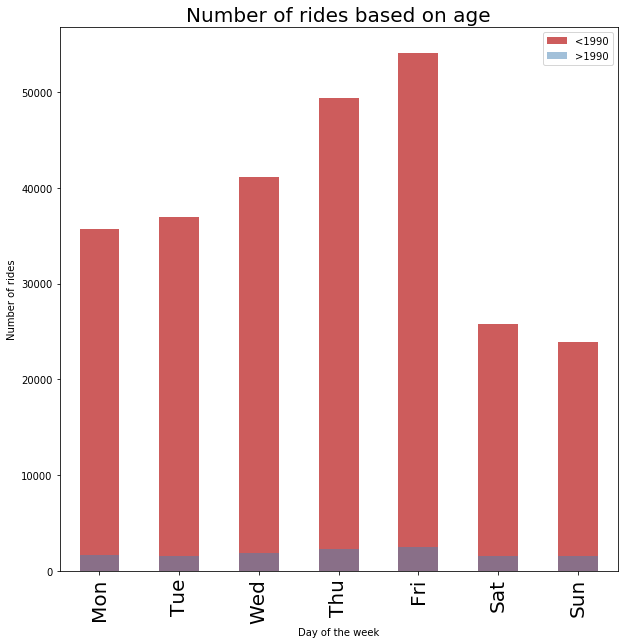

In [16]:
fig = pl.figure(figsize(10,10))
norm_w = 1
((df['date'][df['>1990'] == 0].groupby([df['date'].dt.weekday]).count()) / norm_w).plot(kind="bar", color='IndianRed', label='<1990')
#((df['date'][df['>1990'] == 1].groupby([df['date'].dt.weekday]).count()) / norm_w).plot(kind="bar", color='IndianRed', label='>=1990')
norm_m = 1
ax = ((df['date'][df['>1990'] == 1].groupby([df['date'].dt.weekday]).count()) / norm_m).plot(kind="bar", color='SteelBlue', alpha=0.5, label='>1990')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Day of the week")
pl.title('Number of rides based on age',fontsize=20)
pl.legend()

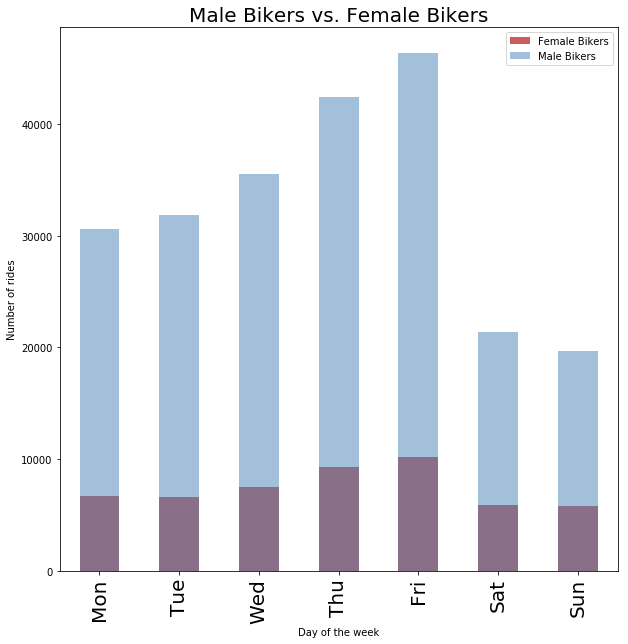

In [48]:
fig = pl.figure(figsize(10,10))
norm_w = 1
((df['date'][df['gender'] == 2].groupby([df['date'].dt.weekday]).count()) / norm_w).plot(kind="bar", color='IndianRed', label='Female Bikers')
#((df['date'][df['>1990'] == 1].groupby([df['date'].dt.weekday]).count()) / norm_w).plot(kind="bar", color='IndianRed', label='>=1990')
norm_m = 1
ax = ((df['date'][df['gender'] == 1].groupby([df['date'].dt.weekday]).count()) / norm_m).plot(kind="bar", color='SteelBlue', alpha=0.5, label='Male Bikers')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Day of the week")
pl.title('Male Bikers vs. Female Bikers',fontsize=20)
pl.legend()